In [1]:
#1a 
#pseudo code
# define the relative error function
# define the two methods for calculating standard deviation
# 1. calculate the (x-mean(x)), square it, sum it, divide by (N-1), sqrt it
# 2. calculate the sum of x^2, subtract the square of x summed, divide by (N-1), sqrt it
# load the text data
# calculate the standard deviation from three methods
# calculate the relative error
# determine the largest and print the values

In [2]:
#actual code
import numpy as np
# define the relative error function
def relative_error(x,y):
    """Relative error as abs((x-y)/y)"""
    return abs((x-y)/y)
# define the two methods for calculating standard deviation
def std2(x):
    """two pass"""
    return np.sqrt(np.sum(np.square(x-np.mean(x)))/(x.size-1))
def std1(x):
    """one pass"""
    var = (np.sum(np.square(x))-x.size*np.square(np.mean(x)))/(x.size-1)
    if var < 0:
        print("Negative variance")
    return np.sqrt(np.abs(var))
def npstd(x):
    """Numpy standard deviation, 1 degree of freedom"""
    return np.std(x,ddof=1)

# load the text data
data = np.loadtxt("cdata.txt")
# calculate the standard deviation from three methods
result = dict(np=npstd, one=std1, two=std2)
# calculate the relative error
error = dict()
actual = np.std(data, ddof=1)
for k,v in result.items():
    result[k] = v(data)
    error[k] = relative_error(result[k],actual)
    print(k,result[k])
# determine the largest and print the values

np 0.07901054781905067
one 0.07901054763832621
two 0.07901054781905067


In [3]:
print('The one-pass method gives sigma = ', result["one"])
print('The two-pass method gives sigma = ', result["two"])
print('              numpy gives sigma = ', result["np"])
print(' ')
print('The one-pass method gives has relative error = ', error["one"])
print('The two-pass method gives has relative error = ', error["two"])

The one-pass method gives sigma =  0.07901054763832621
The two-pass method gives sigma =  0.07901054781905067
              numpy gives sigma =  0.07901054781905067
 
The one-pass method gives has relative error =  2.2873460336752e-09
The two-pass method gives has relative error =  0.0


The one pass method has much larger error (by 7 orders of magnitude or more). Both are reasonably good.

In [4]:
#1c normal distribution

#set up parameters
data_dict = dict(a=(0.,1.,2000), b=(1.e7,1.,2000))
for i,kk in enumerate(data_dict.keys()):
    vv = data_dict[kk]
    result = dict(np=npstd, one=std1, two=std2)
    data = np.random.normal(*vv)
    actual = np.std(data,ddof=1)
    error = dict()
    for k,v in result.items():
        result[k] = v(data)
        error[k] = relative_error(result[k],actual)
        
    print("FOR normal distribution {}".format(i))
    print('  The one-pass method gives sigma = ', result['one'])
    print('  The two-pass method gives sigma = ', result['one'])
    print('                numpy gives sigma = ',  result['np'])
    print('   ')
    print('  The one-pass method gives a relative error = ', error["one"])
    print('  The two-pass method gives a relative error = ', error["two"])
    print('')
    print('============')
    

FOR normal distribution 0
  The one-pass method gives sigma =  1.0356106166264618
  The two-pass method gives sigma =  1.0356106166264618
                numpy gives sigma =  1.035610616626462
   
  The one-pass method gives a relative error =  2.1440935556295223e-16
  The two-pass method gives a relative error =  0.0

FOR normal distribution 1
  The one-pass method gives sigma =  1.0042431240123395
  The two-pass method gives sigma =  1.0042431240123395
                numpy gives sigma =  1.0060753818186174
   
  The one-pass method gives a relative error =  0.0018211933612428555
  The two-pass method gives a relative error =  0.0



In the first case, the smaller relative mean compared to the standard deviation reduces the relative errors to the machine precision. In the second case the one pass method has a much larger error.

## 1d workaround
Since a zero mean random number sequence was better than a non-zero mean, try removing the mean first. The mean shouldn't impact the variance. *BUT* it's expensive to calculate the mean, so removing the first element value might work too.


In [5]:
#1c normal distribution

#set up parameters
data_dict = dict(a=(0.,1.,2000), b=(1.e7,1.,2000))
for i,kk in enumerate(data_dict.keys()):
    vv = data_dict[kk]
    result = dict(np=npstd, one=std1, two=std2)
    data = np.random.normal(*vv)
    data = data - data[0]
    actual = np.std(data,ddof=1)
    error = dict()
    for k,v in result.items():
        result[k] = v(data)
        error[k] = relative_error(result[k],actual)
        
    print("FOR normal distribution {}".format(i))
    print('  The one-pass method gives sigma = ', result['one'])
    print('  The two-pass method gives sigma = ', result['one'])
    print('                numpy gives sigma = ',  result['np'])
    print('   ')
    print('  The one-pass method gives a relative error = ', error["one"])
    print('  The two-pass method gives a relative error = ', error["two"])
    print('')
    print('============')

#same precision!

FOR normal distribution 0
  The one-pass method gives sigma =  0.9754747992601047
  The two-pass method gives sigma =  0.9754747992601047
                numpy gives sigma =  0.9754747992601046
   
  The one-pass method gives a relative error =  1.1381360394622783e-16
  The two-pass method gives a relative error =  0.0

FOR normal distribution 1
  The one-pass method gives sigma =  1.029589909931837
  The two-pass method gives sigma =  1.029589909931837
                numpy gives sigma =  1.029589909931837
   
  The one-pass method gives a relative error =  0.0
  The two-pass method gives a relative error =  0.0



Text(0, 0.5, 'p or q')

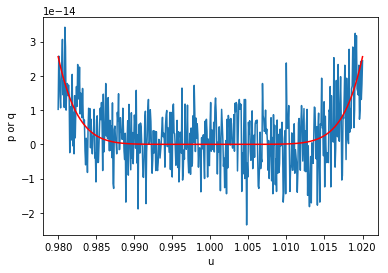

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def p(u):
    """The p function from the question"""
    return (1-u)**8
def q(u):
    """The q function from the question"""
    return (1 - 8*u + 28*u**2 - 
            56*u**3 + 70*u**4 - 
            56*u**5 + 28*u**6 - 
            8*u**7 + u**8)

u = np.linspace(0.98,1.02,500)

plt.plot(u,q(u))
plt.plot(u,p(u),color='r')
plt.xlabel("u")
plt.ylabel("p or q")

The values from q(u) are much noisier than p(u), because the terms in q are often the same size and have opposite signs, so the should cancel in the final answer, but including them in the calculation makes the errors increase.

sigma from calculation =  7.362907034588987e-15
standard deviation of distribution 7.992292568650469e-15


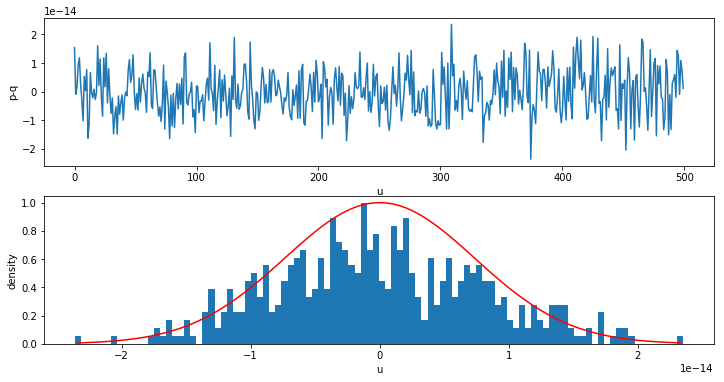

In [7]:
#2b
pu, qu = p(u), q(u)

fig,axs = plt.subplots(2,1, figsize=(12,6))
axs[0].plot(pu-qu)
axs[0].set_xlabel("u")
axs[0].set_ylabel("p-q")

y,x = np.histogram(pu-qu,bins=100)

C = 1.11e-16
N = 44
xm = 0.5*(x[:-1]+x[1:])
w = (x[1:]-x[:-1])
axs[1].bar(xm,y/np.max(y),w)

axs[1].set_xlabel("u")
axs[1].set_ylabel("density")

#approximate
sigma = C * np.sqrt(N) * 10

axs[1].plot(xm, np.exp(-(xm**2/(2*sigma**2))),color='red')


print("sigma from calculation = ",sigma)
print("standard deviation of distribution", np.std(pu-qu))
#It's a Gaussian!

In [8]:
#How about some more accuracy in the sigma calculation?
#Let's assume floating point numbers behave like real data
import uncertainties as unc
def errq(u):
    """Using the uncertainties module as a test.
    
    For some reason the uncertaines module is not happy using the original formulation, 
    and loses the uncertainty component if I just call q(u) for the correct datatype in u.
    Rewrite as list iterations to preserve and propagate the error.
    """
    coeffs = [unc.ufloat(x,C*abs(x)) for x in [1,-8,+28,-56,+70,-56,+28,-8,1]]
    pows = [1,u**1,u**2,u**3,u**4,u**5,u**6,u**7,u**8]
    r = sum([c*p for c,p in zip(coeffs, pows)])
    return r 

def alt_errq(u):
    """Using the uncertainties module as a test.
    
    Full equation with errors in the coefficients
    """
    c = [unc.ufloat(x,C*abs(x)) for x in [1,-8,+28,-56,+70,-56,+28,-8,1]]
    r = c[0]+c[1]*u**1+c[2]*u**2+c[3]*u**3+c[4]*u**4+c[5]*u**5+c[6]*u**6+c[7]*u**7+c[8]*u**8
#    r = sum([c*p for c,p in zip(coeffs, pows)])
    return r 

def halfhearted_errq(u):
    """Using the uncertainties module as a test.
    
    With no errors in the coefficients
    """

    c = [1,-8,+28,-56,+70,-56,+28,-8,1]
    
    r = c[0]+c[1]*u**1+c[2]*u**2+c[3]*u**3+c[4]*u**4+c[5]*u**5+c[6]*u**6+c[7]*u**7+c[8]*u**8
#    r = sum([c*p for c,p in zip(coeffs, pows)])
    return r 
def errp(u):
    """Using uncertainties for error in P.
    
    Added the uncertainty the the '1' value"""
    return (unc.ufloat(1,C) - u)**8

uval=0.99
eq = errq(unc.ufloat(uval,C*uval))
ep = errp(unc.ufloat(uval,C*uval))
print("U = ",uval)
print("Error from q = ", eq.std_dev)
print("alt Error from q = ", alt_errq(unc.ufloat(uval,C*uval)).std_dev)
print("only 'u' errors from q = {} #seems wrong".format(halfhearted_errq(unc.ufloat(uval,C*uval)).std_dev))
print("standard deviation= ", np.std(pu-qu))
print("Error from p = ", ep.std_dev)

U =  0.99
Error from q =  1.2097616769024215e-14
alt Error from q =  1.2097616769024215e-14
only 'u' errors from q = 0.0 #seems wrong
standard deviation=  7.992292568650469e-15
Error from p =  1.2495583117245947e-29


## 2c 

$$\frac{\sigma}{\sum_ix_i} = \frac{C}{\sqrt{N}}\frac{\sqrt{\overline{x^2}}}{\overline{x}}$$

We want the left hand side to be ~1 for a 100% error. The denominator is roughtly $(1-u)^8$, and the numerator is 
$10^{-14}$. Re-writing as

$$ \sigma^{1/8} = 1-u$$
and solving for $\sigma=10^{-14}$ gives $u\approx 0.98$.

As $u$ exceeds 0.98 the error will exceed 100%


In [9]:
#sigma = 8e-15
u_thresh = (1-sigma**(1/8))
print(u_thresh)

0.9828848320724172


### 2d


standard deviation is  1.4122106698406831e-16


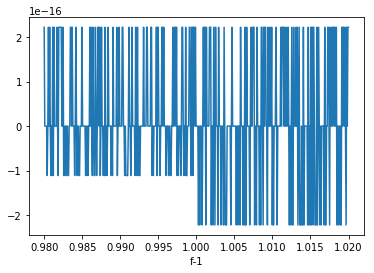

In [10]:
f = u**8 / ((u**4)*(u**4))
print("standard deviation is ",np.std(f))
plt.plot(u,f-1)
plt.xlabel("u")
plt.xlabel("f-1");


# 1. Bessel Functions

These appear in various physics problems, and are given by:
$$J_m(x) = \frac{1}{\pi} \int_0^\pi \cos(m \theta - x \sin \theta) d\theta $$
where $m$ is a whole number and $x$ is a non-negative real number.
Hint for this lab:
$$\lim _{x \rightarrow 0} \left( \frac{J_1(x)}{x} \right) = 1/2$$

## Part (a) 

Write pseudocode for your own Python function that calculates the value of the Bessel function
$J_m(x)$, taking $m$ and $x$ as inputs, using Simpson’s rule with $N$ points. $N$ is a parameter that you set in your code.

## Part (b)
Now write the actual code.

## Part (c)
Use the code from the previous part  to make a plot, on a single graph, of the Bessel
functions $J_0, J_1, J_2$ as a function of $x$ from $x = 0$ to $x = 20$.

## Part (d)
scipy.special includes some special functions that are a little too exotic to be part of NumPy. One of such special function is the Bessel function, called jv . Compare graphically the difference between the results of your Bessel function from the previous part, and the results of the SciPy version.

In [4]:
from scipy.special import jv

# 2. Black Body Radiation

The black body function can be written as a function of wavenumber $\nu$ and temperature $T$, using the Planck constant $h$, the speed of light $c$ and the Boltzmann constant $k$:
$$B = \frac{2h\nu^3}{c^2(\exp{\frac{h\nu}{kT}}-1)}$$
The total energy per unit area emitted by a black body follows Stefan's law:
$W = \sigma T^4$,
where $\sigma$ is the Stefan-Boltzmann constant. (Of course, you remember all this if I was your prof for PHY252.)

Equivalently, using the change of variables $x = \frac{h \nu}{kT}$:
$$W = \pi\int_0^\infty B d\nu =  C_1\int_0^\infty\frac{x^3}{e^x-1} dx $$
with $C_1 = \frac{k^4}{4 \pi^2 c^2 h^3}$

We can convert the limits of integration to [0,1] by another variable transform
$ z = \frac{x}{1+x}$
or equivalently
$ x = \frac{z}{1-z}$:
$$\int_0^\infty f(x)dx = \int_0^1 \frac{1}{(1-z)^2}f\left(\frac{z}{1-z}\right)dz$$

## Part (a)
Write code for the functions x(z), f(x), and f(z). 

## Part (b)
Incorporating your functions from the previous part, write code to calculate W (with T as input) using the trapezoidal rule.

## Part (c)
Now repeat the previous part using Simpson's rule.

## Part (d)
Using the code from the previous part, calculate a value for the Stefan-Boltzmann constant in SI units, to three significant figures or more. Compare it to the value from NIST that is included in the scipy.constants package (https://docs.scipy.org/doc/scipy/reference/constants.html)

In [5]:
from scipy.constants import Stefan_Boltzmann

In [11]:
def zfunc(z):
    """mapping 0-> infinity into 1->0"""
    return z/(1-z)
def integrand(z):
    """Re-writing the integrand in z"""
    x = zfunc(z)
    return x**3 / (np.exp(x)-1) * 1/(1-z)**2

def trapz_int(a, b, N, f):
    """Trapezoid rule of integration
    IN:
    a, b: [floats] lower and upper bounds of integration
    N: [int] number of slices
    f: [function] a function to integrate
    OUT:
    [float] the integral

    PSEUDO-CODE:
    1. from a, b and N, compute h the int step
    2. initialize the result by adding (beginning + end)/2.
    3. loop to add the other terms f(a+kh)
    4. multiply the result by h to create final result
    Author: Nicolas Grisouard

    """
    # 1.: from a, b and N, compute h
    h = (b-a)/N

    # 2.: the beginning and end
    result = 0.5*(f(a) + f(b))

    # 3. Then, loop over interior points
    for k in range(1, N):
        result += f(a + k*h)

    return h*result  # 4.


def simps_int(a, b, N, f):
    """Simpson's rule of integration
    IN:
    a, b: [floats] lower and upper bounds of integration
    N: [int] number of slices, HAS TO BE EVEN
    f: [function] a function to integrate
    OUT:
    [float] the integral

    PSEUDO-CODE:
    1. test if N is odd or even, and throw an error if odd
    2. from a, b and N, compute h the int step
    3. initialize the result by adding (beginning + end).
    4. loop over the odd k's to sum f(a+kh) from 1 to N-1
    5. add 4*(sum above) to the result
    6. loop over the even k's to sum f(a+kh) from 2 to N-2
    7. add 2*(sum above) to the result
    8. multiply the result by h/3 to create final result
    Author: Nicolas Grisouard

    """

    # 1. test if N is odd or even, and throw an error if odd
    if N % 2 == 1:  # if True, the number is even
        # this aborts the calculation
        raise NameError("Simpson's rule needs an even number of slices!")

    # 2.: from a, b and N, compute h
    h = (b-a)/N

    # 3.: the beginning and end
    result = f(a) + f(b)

    # 4. loop over the odd k's to sum f(a+kh) from 1 to N-1
    odds = 0.
    for k in range(1, N, 2):
        odds += f(a + k*h)
    result += 4.*odds  # 5. add 4*(sum above) to the result

    # 6. loop over the even k's to sum f(a+kh) from 2 to N-2
    evens = 0.
    for k in range(2, N, 2):
        evens += f(a + k*h)
    result += 2*evens  # 7. add 2*(sum above) to the result

    return h*result/3  # 8. multiply the result by h/3 to create final result

In [12]:
lower, upper = 1e-5, 1-1e-5
npoints = 10000
integral_N = simps_int(lower, upper, npoints, integrand)
integral_2N = simps_int(lower, upper, 2*npoints, integrand)
print("W={} for N={}".format(integral_N, npoints))
print("W={} for N={}".format(integral_2N, 2*npoints))

#Using Simpon approximation to compute the accuracy
print("accuracy = {}".format((integral_2N - integral_N) / 15))

W=6.493939402266821 for N=10000
W=6.493939402266824 for N=20000
accuracy = 2.3684757858670006e-16


/Users/lee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


## 3c. Stefan Boltzmann constant
From above we have the integral, now multiple by constants $$\frac{k_b^4}{4\pi^2c^2\hbar^3}$$

In [13]:
from scipy.constants import pi, Boltzmann, speed_of_light, hbar, Stefan_Boltzmann

mySB = integral_N * Boltzmann**4 / (4*pi**2 * speed_of_light**2 * hbar**3)
ssSB = Stefan_Boltzmann
print("My value for Stefan-Boltzmann = ", mySB)
print("Scipy value for Stefan-Boltzmann = ", ssSB)

My value for Stefan-Boltzmann =  5.6703668160832614e-08
Scipy value for Stefan-Boltzmann =  5.670367e-08


The Scipy value is taken from the NIST database, and includes an uncertainty in the measurement, so it is the currently accepted value. Our integral doesn't need to be machine precision level because the actual constant is only known to 8 digits.

In [14]:
#define V function to integrate using simpsons
#takes npoints, r, z, Q, l
# define integrand calculation
#numerator
#denominator
#divide and return to simpsons
#integrate from -pi/2 to pi/2
#return


In [15]:
from scipy.constants import epsilon_0
def Vrz(r,z, Q,l,npoints=10000):
    """Integrate the function with fixed values of Q, l using Simpson's 1/3 rule.
    """
    def integrand(u):
        """The integrand function form the lab"""
        tu = np.tan(u)
        num = Q * np.exp(-tu**2)
        sqrt_term = np.sqrt((z-l*tu)**2 + r**2)
        denom = 4 * np.pi * epsilon_0 * np.cos(u)**2 * sqrt_term
        return num/denom
    return simps_int(-np.pi/2, np.pi/2, npoints, integrand)

In [16]:
from tqdm import tqdm_notebook as tqdm
#testing at z=0
def vtest(r,Q,l,npoints=100):
    """Compare the numerical and analytical integrations for values of 
    radius, charge, length."""
    from scipy.special import kn
    x = r**2 / (2*l**2)
    a1 = (Q/(4*np.pi*epsilon_0*l)) * np.exp(x)*kn(0,x)
    a2 = Vrz(r,0,Q,l,npoints=npoints)
    d = (a1 - a2)/max(a2,a1)
    return a1,a2,d

Ntest=100
deltas = np.zeros((Ntest,3))
i=0
while i< Ntest :
    r,Q,l = np.random.rand()*1,np.random.rand()*1,np.random.rand()*1
    x = r**2 / (2*l**2)
    if x < 100:
        deltas[i] = vtest(r,Q,l)
        i+=1

print("""Over {} samples: 
Differences of 
min = {}
max = {}
mean = {}""".format(Ntest,
                    np.min(np.abs(deltas[:,2])),
                    np.mean(np.abs(deltas[:,2])),
                    np.max(np.abs(deltas[:,2]))
                    ))

Over 100 samples: 
Differences of 
min = 6.012296467504634e-11
max = 0.007132310413429578
mean = 0.6890407166267748


In [17]:
def plot_charges(N=8): #oops, so 10,000 wasn't needed?
    """Plot the charge as a function of position.
    
    N= number of slices in Simpson's rule"""
    r = np.arange(0.25,5,0.01)
    Q=1e-13
    l=1
    z=0
    data = np.array([vtest(ri,Q,l,npoints=N) for ri in r])
    fig, axs = plt.subplots(1,2,figsize=(12,6))
    axs[0].plot(r,data[:,0], label="Bessel")
    axs[0].plot(r,data[:,1], label="Simpson's")
    axs[0].set_xlabel("Radius (mm)")
    axs[0].set_ylabel("Potential")
    axs[1].plot(r,data[:,1]-data[:,0], label="Differences")
    axs[1].set_xlabel("Radius (mm)")
    axs[1].set_ylabel("Potential Difference")
    plt.tight_layout()

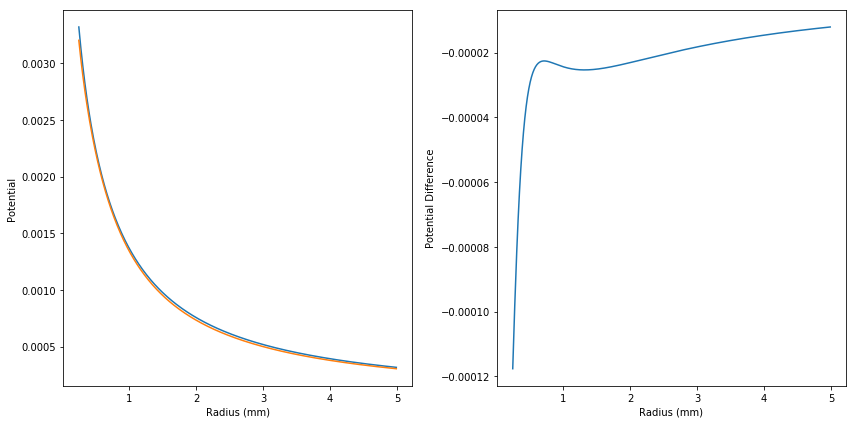

In [18]:
plot_charges(8)

In [19]:
def find_N(N=2):
    """Doubling method to find the approximate number of points needed to 
    achieve errors of <1e-6"""
    r = np.arange(0.25,5,0.01)
    Q=1e-13
    l=1
    z=0
    data = np.array([vtest(ri,Q,l,npoints=N) for ri in r])
    mx = np.nanmax(np.abs(data[:,2]))
    #print(N,mx)
    if mx > 1e-6:
        N=find_N(N*2)
    elif N>1e4:
        return N
    return N

N required for accuracy < 1e-6 fractional = 64


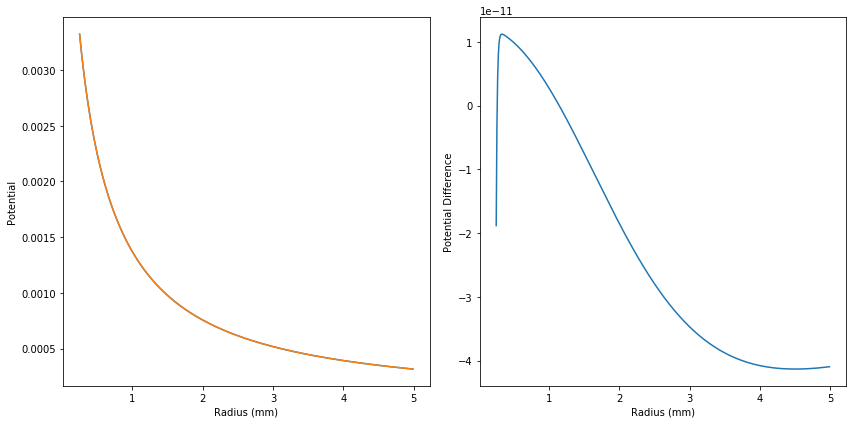

In [20]:
nopt = find_N()
print("N required for accuracy < 1e-6 fractional = {}".format(nopt))
#plot_charges(N=10)
plot_charges(nopt)

### 4b 

In [21]:
import itertools
from joblib import Parallel, delayed
#This is probably excessive?
r = np.geomspace(0.25,5,101)
z = np.hstack([np.geomspace(-5,-0.01,101), np.geomspace(0.01,5,101)])
Q=1e-13
l=1
data = Parallel(n_jobs=8)(delayed(Vrz)(ri,zi,Q,l,npoints=nopt) 
                          for ri,zi in tqdm(itertools.product(r,z),
                                            total=len(r)*len(z)))
data =np.array(data).reshape(len(r),len(z))

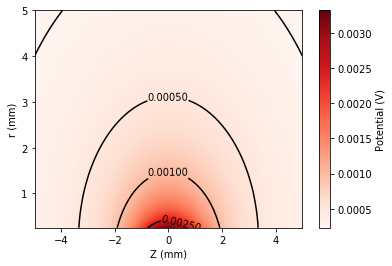

In [22]:
h = plt.pcolormesh(z,r,data,cmap=plt.cm.Reds)
cs = plt.contour(z,r,data,levels=[2.5e-4,5e-4,10e-4,25e-4],colors='k')
plt.clabel(cs,fmt="%0.5f")

plt.xlabel("Z (mm)")
plt.ylabel("r (mm)")
C = plt.colorbar(h)
C.set_label("Potential (V)")